In [49]:
import pandas as pd 
import numpy as np

churn = pd.read_csv(r"D:\Finalproject\telecom_users.csv")

In [50]:
churn.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
Unnamed: 0          5986 non-null int64
customerID          5986 non-null object
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 non-null int64
PhoneService        5986 non-null object
MultipleLines       5986 non-null object
InternetService     5986 non-null object
OnlineSecurity      5986 non-null object
OnlineBackup        5986 non-null object
DeviceProtection    5986 non-null object
TechSupport         5986 non-null object
StreamingTV         5986 non-null object
StreamingMovies     5986 non-null object
Contract            5986 non-null object
PaperlessBilling    5986 non-null object
PaymentMethod       5986 non-null object
MonthlyCharges      5986 non-null float64
TotalCharges        5986 non-null object
Churn               5986 non-null 

In [51]:
#Basic Data Cleaning and checking data types 

churn["TotalCharges"] = churn["TotalCharges"].replace(" ", np.nan)
print("Na Values in the dataset\n" , churn.isna().sum())

#Removing the na rows 
churn = churn.dropna()
#changing the datatype 
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

#Removing the unamed column 
churn = churn.drop('Unnamed: 0', axis=1)

#
churn['SeniorCitizen'] = churn['SeniorCitizen'].replace({0:'No', 1:'Yes'})
#10 na values


Na Values in the dataset
 Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64


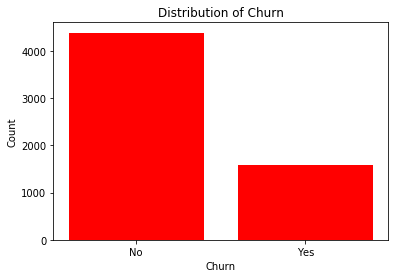

In [52]:
#Exploratory Analysis 
#Data Visualizations and some statistics
import pandas as pd
import matplotlib.pyplot as plt

data = churn

churn_counts = data['Churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values , color = 'red')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')
plt.show()


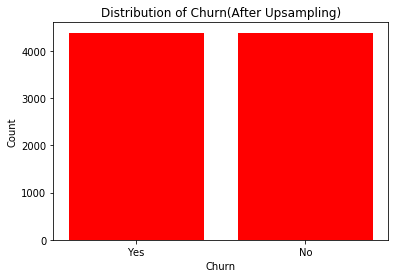

In [53]:
#Distribution after upsampling 
from sklearn.utils import resample

# Separate majority and minority classes
churn_majority = churn[churn['Churn']=='No']
churn_minority = churn[churn['Churn']=='Yes']

# Upsample minority class
churn_minority_upsampled = resample(churn_minority, 
                                    replace=True,     # sample with replacement
                                    n_samples=len(churn_majority),    # to match majority class
                                    random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
churn_upsampled = pd.concat([churn_majority, churn_minority_upsampled])

data = churn_upsampled

churn_counts = data['Churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values , color = 'red')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn(After Upsampling)')
plt.show()


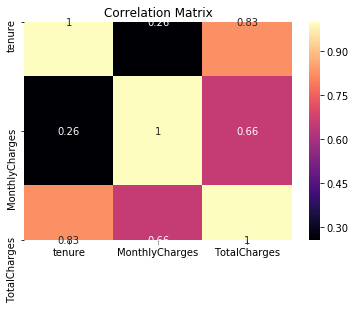

In [54]:
#Feature importance
#Seeing which features are important
import seaborn as sns
from matplotlib import pyplot as plt 


corrmatrix = churn.corr()
sns.heatmap(corrmatrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()


In [55]:
highest = corrmatrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
print("The Features(Healthy) which have the highest value are \n " , highest[1:2] )
print("The Features(Healthy) which have the Lowest value are \n " , highest[-1:] )


The Features(Healthy) which have the highest value are 
  TotalCharges  tenure    0.827439
dtype: float64
The Features(Healthy) which have the Lowest value are 
  MonthlyCharges  tenure    0.255676
dtype: float64


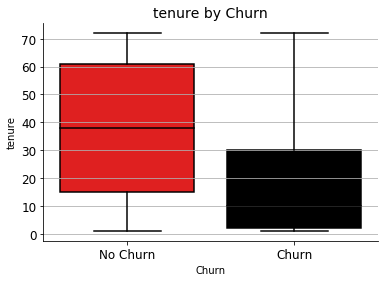

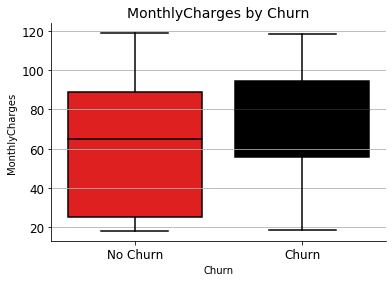

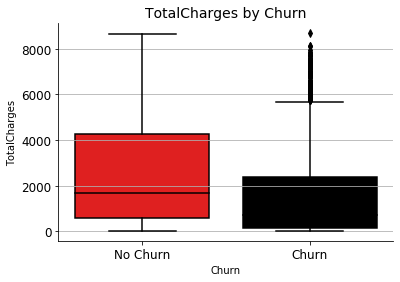

In [56]:
# Boxplots of continuous variables by target variable
continuous_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Define custom colors
colors = ['red', 'black']

for var in continuous_vars:
    # Create the boxplot
    ax = sns.boxplot(x='Churn', y=var, data=churn, palette=colors)
    
    # Add labels and title
    ax.set_xlabel('Churn')
    ax.set_ylabel(var)
    ax.set_title(f'{var} by Churn', fontsize=14)
    
    # Customize the tick labels
    ax.set_xticklabels(['No Churn', 'Churn'], fontsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # Add horizontal grid lines
    ax.yaxis.grid(True)
    
    # Remove the top and right spines
    sns.despine()
    
    # Show the plot
    plt.show()


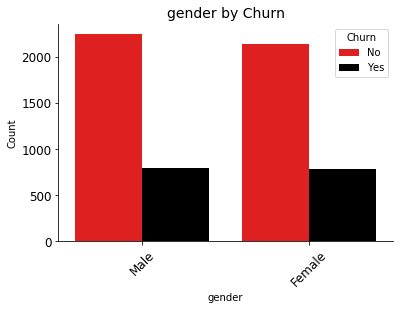

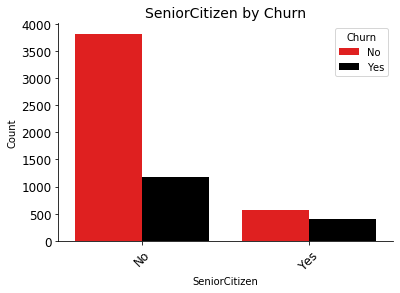

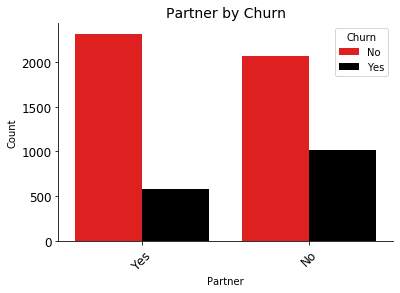

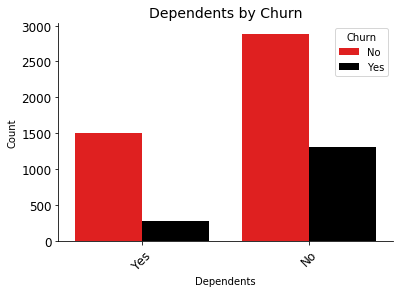

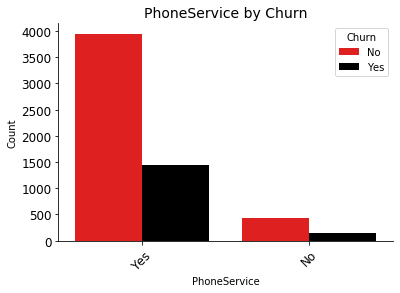

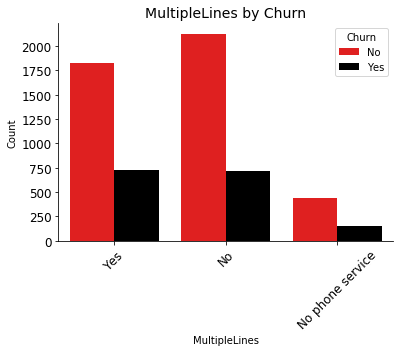

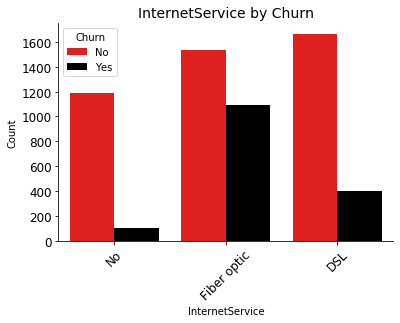

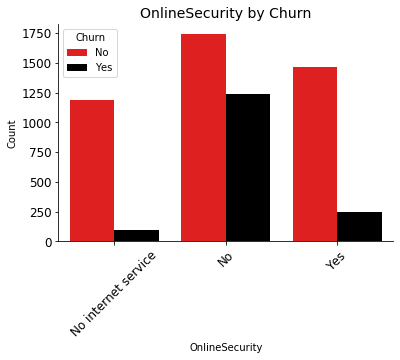

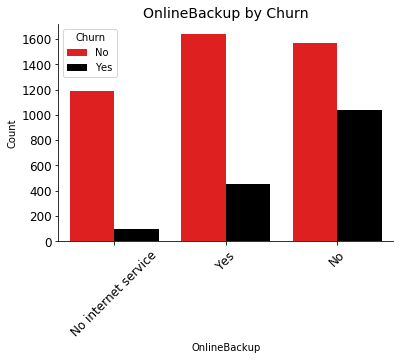

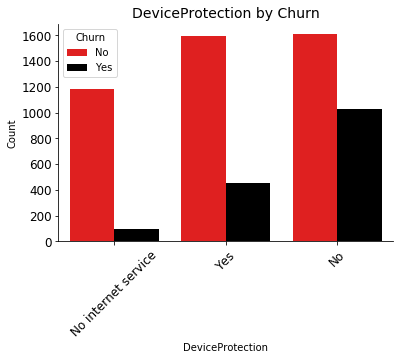

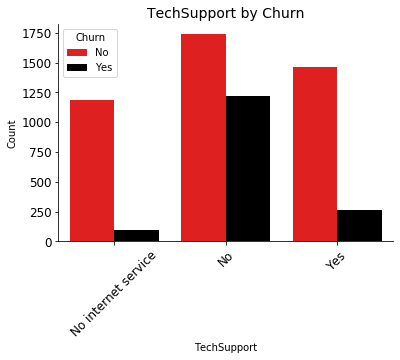

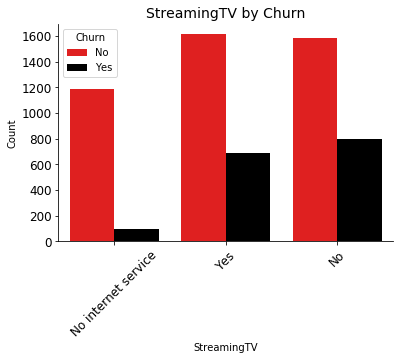

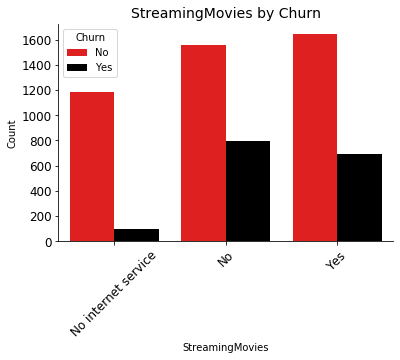

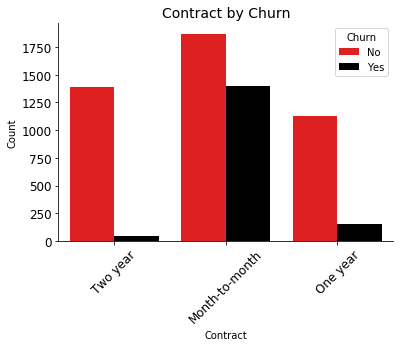

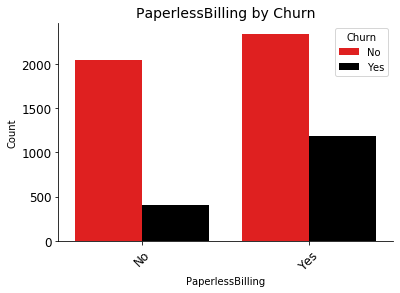

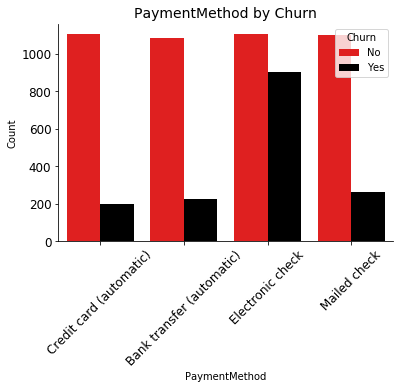

In [57]:
# Bar plots of categorical variables by target variable
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Define custom colors
colors = ['red', 'black']

for var in categorical_vars:
    # Create the countplot
    ax = sns.countplot(x=var, hue='Churn', data=churn, palette=colors)
    
    # Add labels and title
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_title(f'{var} by Churn', fontsize=14)
    
    # Customize the tick labels
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='both', labelsize=12)
    
    # Add legend and remove the top and right spines
    ax.legend(title='Churn', labels=['No', 'Yes'])
    sns.despine()
    
    # Show the plot
    plt.show()


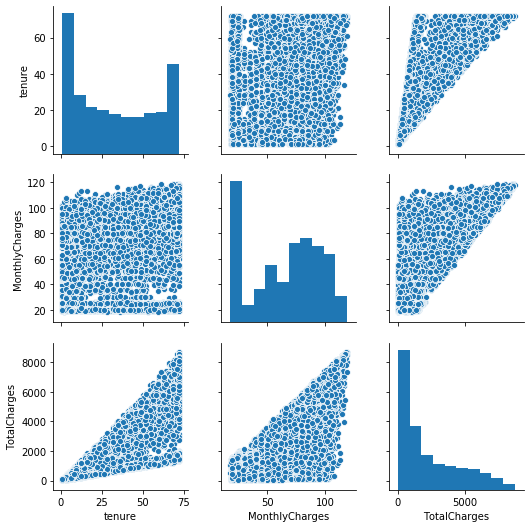

In [58]:
sns.pairplot(churn[continuous_vars])
plt.show()

In [59]:
#Upsampling before using algorithms 
from sklearn.utils import resample

churn_majority = churn[churn['Churn']=='No']
churn_minority = churn[churn['Churn']=='Yes']

churn_minority_upsampled = resample(churn_minority, 
                                    replace=True,     
                                    n_samples=len(churn_majority),    
                                    random_state=42)  

churn_upsampled = pd.concat([churn_majority, churn_minority_upsampled])



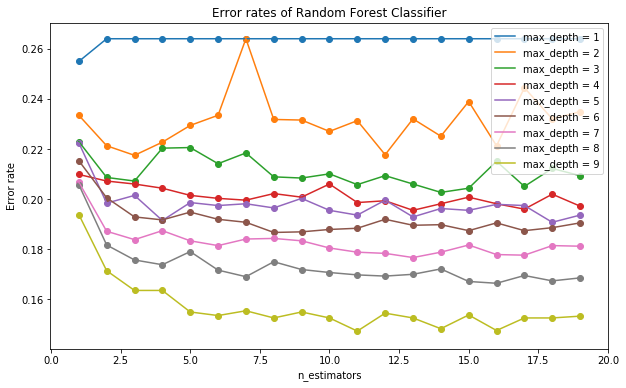

In [60]:
#Random Forest Model on our dataset 
#Random Forest 

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix




data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features


X = data[features].values
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=3)


# loop over values of N and d
Ns = range(1, 20)
ds = range(1, 10)
N_estimators = []
error_rates = []
depth = []

for N in Ns:
    for d in ds:
        model = RandomForestClassifier(n_estimators=N, max_depth=d, criterion='entropy')
        model = model.fit(X, Y)
        prediction = model.predict(X_test)
        accuracy = np.mean(prediction == Y_test)
        depth.append(d)
        N_estimators.append(N) 
        error_rates.append(1 - accuracy) 
        

plt.figure(figsize=(10, 6))
for d in ds:
    plt.plot([N_estimators[i] for i in range(len(depth)) if depth[i] == d],
             [error_rates[i] for i in range(len(depth)) if depth[i] == d], label=f"max_depth = {d}")
    plt.scatter([N_estimators[i] for i in range(len(depth)) if depth[i] == d],
             [error_rates[i] for i in range(len(depth)) if depth[i] == d], marker='o')

plt.xlabel('n_estimators')
plt.ylabel('Error rate')
plt.title('Error rates of Random Forest Classifier')
plt.legend()
plt.show()





In [61]:
#finding the optimal value of n estimators and depth 
min_error_rate = min(error_rates)
min_error_rate_index = error_rates.index(min_error_rate)
best_n = N_estimators[min_error_rate_index]
best_d = depth[min_error_rate_index]

print("Best value of n_estimators" ,best_n )
print("Best value of max_depth" ,best_d)

Best value of n_estimators 11
Best value of max_depth 9


In [76]:
#using the optimal value to predict , n = 11 , depth = 9

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features


X = data[features].values
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=3)


model = RandomForestClassifier(n_estimators=11, max_depth=9, criterion='entropy')
model = model.fit(X, Y)
prediction = model.predict(X_test)

accuracy = np.mean(prediction == Y_test)


cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for Random Forest is(%): ", round(accuracy , 2)*100 )

print("The Confusion Matrix of the Random Forest classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy for Random Forest is(%):  84.0
The Confusion Matrix of the Random Forest classifier is (%):
 [[2885  194]
 [ 455  650]]
TPR: 0.94
TNR: 0.59


In [63]:
#Experimenting with features 

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))


Feature ranking:
1. Contract (0.185271)
2. TotalCharges (0.134362)
3. tenure (0.131475)
4. MonthlyCharges (0.120126)
5. OnlineSecurity (0.117277)
6. TechSupport (0.055041)
7. PaymentMethod (0.043012)
8. InternetService (0.037577)
9. OnlineBackup (0.036030)
10. PaperlessBilling (0.020606)
11. MultipleLines (0.018834)
12. Dependents (0.017908)
13. DeviceProtection (0.015692)
14. gender (0.013799)
15. StreamingMovies (0.013693)
16. StreamingTV (0.012309)
17. Partner (0.012296)
18. SeniorCitizen (0.010698)
19. PhoneService (0.003994)


In [64]:
#using the optimal value to predict , n = 14 , depth = 9

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features


#top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
#features = top_features


X = data[features].values
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)


model = RandomForestClassifier(n_estimators=17, max_depth=9, criterion='entropy')
model = model.fit(X, Y)
prediction = model.predict(X_test)

accuracy = np.mean(prediction == Y_test)


cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for Random Forest is(%): ", round(accuracy , 2)*100 )

print("The Confusion Matrix of the Random Forest classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


#Dint workout 

The Accuracy for Random Forest is(%):  84.0
The Confusion Matrix of the Random Forest classifier is (%):
 [[1241   92]
 [ 186  274]]
TPR: 0.93
TNR: 0.6


In [65]:
#Naive Bayes 

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features

X = data[features].values
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)

NB_classifier = GaussianNB().fit(X_train, Y_train)
prediction = NB_classifier.predict(X_test)
accuracy = np.mean(prediction == Y_test)
cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for Naive Bayes is(%): ", round( 100*accuracy , 2) )

print("The Confusion Matrix of the Naive Bayes classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy for Naive Bayes is(%):  75.57
The Confusion Matrix of the Naive Bayes classifier is (%):
 [[1016  317]
 [ 121  339]]
TPR: 0.76
TNR: 0.74


In [66]:
#Trying with top_features

#Naive Bayes 

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
features = top_features


X = data[features].values
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)

NB_classifier = GaussianNB().fit(X_train, Y_train)
prediction = NB_classifier.predict(X_test)
accuracy = np.mean(prediction == Y_test)
cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for Naive Bayes after using Top Features is(%): ", round( 100*accuracy , 2) )

print("The Confusion Matrix of the Naive Bayes classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )

#Dint workout 

The Accuracy for Naive Bayes after using Top Features is(%):  72.34
The Confusion Matrix of the Naive Bayes classifier is (%):
 [[948 385]
 [111 349]]
TPR: 0.71
TNR: 0.76


In [67]:

#logistic Regression  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)

log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train, Y_train)

prediction = log_reg_classifier.predict(X_test)
accuracy = np.mean(prediction == Y_test)
cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for Logistic Regression is(%): ",round( 100*accuracy , 2) )

print("The Confusion Matrix of the Logistic Regression classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy for Logistic Regression is(%):  80.59
The Confusion Matrix of the Logistic Regression classifier is (%):
 [[1191  142]
 [ 206  254]]
TPR: 0.89
TNR: 0.55


In [68]:
#Using the RF top features 

#logistic Regression  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
features = top_features


X = data[features].values
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)

log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train, Y_train)

prediction = log_reg_classifier.predict(X_test)
accuracy = np.mean(prediction == Y_test)
cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for Logistic Regression after using Top Features is(%): ",round( 100*accuracy , 2) )

print("The Confusion Matrix of the Logistic Regression classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


#Slight Increase 

The Accuracy for Logistic Regression after using Top Features is(%):  79.09
The Confusion Matrix of the Logistic Regression classifier is (%):
 [[1163  170]
 [ 205  255]]
TPR: 0.87
TNR: 0.55


In [69]:
#Decision Trees

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
#features = top_features


X = data[features].values
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)


tree_classifier = tree.DecisionTreeClassifier(criterion='entropy')

tree_classifier = tree_classifier.fit(X_train, Y_train)

prediction = tree_classifier.predict(X_test)

accuracy = np.mean(prediction == Y_test)


cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for Decision trees is(%): ", round( 100*accuracy , 2) )

print("The Confusion Matrix of the Decision trees classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )




The Accuracy for Decision trees is(%):  72.39
The Confusion Matrix of the Decision trees classifier is (%):
 [[1076  257]
 [ 238  222]]
TPR: 0.81
TNR: 0.48


In [70]:
#SVM classifier 
#SVM linear
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)


svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, Y_train)

prediction = svm_classifier.predict(X_test)
accuracy = svm_classifier.score(X_test, Y_test)



cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for SVM(linear) is(%): ", round(accuracy , 2)*100 )

print("The Confusion Matrix of the SVM(linear) classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy for SVM(linear) is(%):  80.0
The Confusion Matrix of the SVM(linear) classifier is (%):
 [[1195  138]
 [ 221  239]]
TPR: 0.9
TNR: 0.52


In [71]:
#SVM classifier 
#SVM linear
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)


svm_classifier = svm.SVC(kernel='rbf' )
svm_classifier.fit(X_train, Y_train)

prediction = svm_classifier.predict(X_test)
accuracy = svm_classifier.score(X_test, Y_test)



cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for SVM(Gaussian) is(%): ", round(accuracy , 2)*100 )

print("The Confusion Matrix of the SVM(Gaussian) classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy for SVM(Gaussian) is(%):  80.0
The Confusion Matrix of the SVM(Gaussian) classifier is (%):
 [[1227  106]
 [ 244  216]]
TPR: 0.92
TNR: 0.47


In [72]:
#SVM classifier 
#SVM linear
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=3)


svm_classifier = svm.SVC(kernel='poly' , degree = 3)
svm_classifier.fit(X_train, Y_train)

prediction = svm_classifier.predict(X_test)
accuracy = svm_classifier.score(X_test, Y_test)



cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for SVM(poly at degree 3) is(%): ", round(accuracy , 2)*100 )

print("The Confusion Matrix of the SVM(poly at degree 3) classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy for SVM(poly at degree 3) is(%):  79.0
The Confusion Matrix of the SVM(poly at degree 3) classifier is (%):
 [[1200  133]
 [ 247  213]]
TPR: 0.9
TNR: 0.46


The Accuracy of the KNN classifier at k = 1 is (%): 72.06
The Accuracy of the KNN classifier at k = 3 is (%): 75.22
The Accuracy of the KNN classifier at k = 5 is (%): 76.29


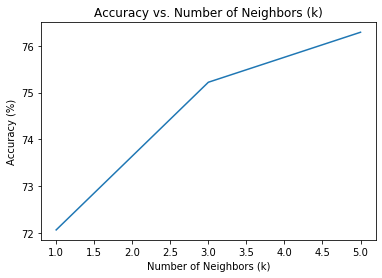

In [73]:
#Knn Classifier 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=3)


percentages = []
kvalues = [1, 3, 5]
for k in kvalues:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    prediction = knn_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, prediction)
    percentages.append(round(100 * accuracy, 2))
    print("The Accuracy of the KNN classifier at k =", k, "is (%):", round(100 * accuracy, 2))


plt.plot(kvalues, percentages)
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy (%)")
plt.show()
    

In [74]:
#Taking k as 5
data = churn 

cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=3)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, Y_train)
prediction = knn_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, prediction)
cm = confusion_matrix(Y_test, prediction)

print("The Accuracy of the KNN classifier at k = 5  is (%):", round(100 * accuracy, 2))
print("The Confusion Matrix of the KNN classifier at k = 5  is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )




The Accuracy of the KNN classifier at k = 5  is (%): 76.29
The Confusion Matrix of the KNN classifier at k = 5  is (%):
 [[2638  441]
 [ 551  554]]
TPR: 0.86
TNR: 0.5


In [75]:
#Ada boost
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC




cat_features = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['Churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=3)



svc = SVC(probability=True, kernel='linear')
lr = LogisticRegression()
nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=14, max_depth=9, criterion='entropy')


svc = SVC(probability=True, kernel='linear')
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=0.5 , base_estimator=lr)
adaboost = adaboost.fit(X_train, Y_train)

prediction = adaboost.predict(X_test)
accuracy = accuracy_score(Y_test, prediction)
cm = confusion_matrix(Y_test, prediction)

print("The Accuracy of the ada classifier at k = 5  is (%):", round(100 * accuracy, 2))
print("The Confusion Matrix of the ada classifier at k = 5  is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy of the ada classifier at k = 5  is (%): 79.71
The Confusion Matrix of the ada classifier at k = 5  is (%):
 [[2787  292]
 [ 557  548]]
TPR: 0.91
TNR: 0.5
